# importacion de librerias

In [81]:
from sklearn.cluster import KMeans
from sklearn.linear_model import Ridge
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# split para modelado
from sklearn.model_selection import train_test_split
# Scaled | Escalado
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Encoding | Codificación
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
# To save models
import json
import pickle
# Feature Selection
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.linear_model import LogisticRegression
# Métricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
# Optimizar
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# from tqdm import tqdm
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso

df = pd.read_csv("https://breathecode.herokuapp.com/asset/internal-link?id=929&path=medical_insurance_cost.csv", sep=",")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Especificacion de los datos

age: Edad del beneficiario principal (numérico)

sex: Género del beneficiario principal (categórico)

bmi: índice de masa corporal (numérico)

children. Número de niños/dependientes cubiertos por un seguro médico (numérico)

smoker: ¿Es fumador? (categórico)

region: Área residencial del beneficiario en USA: noreste, sureste, suroeste, noroeste (categórico)

charges: Prima del seguro médico (numérico)

# Analisis descriptivo

In [82]:
# Obtener las dimensiones
df.shape

(1338, 7)

In [83]:
# Obtener información sobre tipos de datos y valores no nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [84]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


<h3>Observaciones</h3>
se tiene un total de 1338 registros con 7 tipos de datos, no tenemos datos nulos, 4 datos numericos y 3 datos del tipo categorico

el promedio de edades es de 39.29 con un minimo de 18 años y un maximo de 64

con un promedio de 1 niño cubierto por el seguro y un minimo de cero y maximo 5, el 75% de las personas tienen como maximo 2 niños cubiertos

tenemos un indice de masa corporal minimo de 15.96, un maximo de 53,13 en donde el 25% tiene un indice de masa corporal mayor a 34 lo que indica personas obesas

el precio del seguro medico "charges" nuestro target o variable de respuesta tiene valores minimos de 1121 y maximo de 63770 lo que indica diferencias con un rango bastante amplio del seguro medico

In [85]:
#datos duplicados
df.duplicated().sum()

np.int64(1)

se encuentra solo una columna duplicada. Se conssidera que las 7 columnas son importantes por lo cual no se precedera a eliminar ninguna columna

# Paso 5: Análisis de Variables

<h3> Analisis univariante categoricas

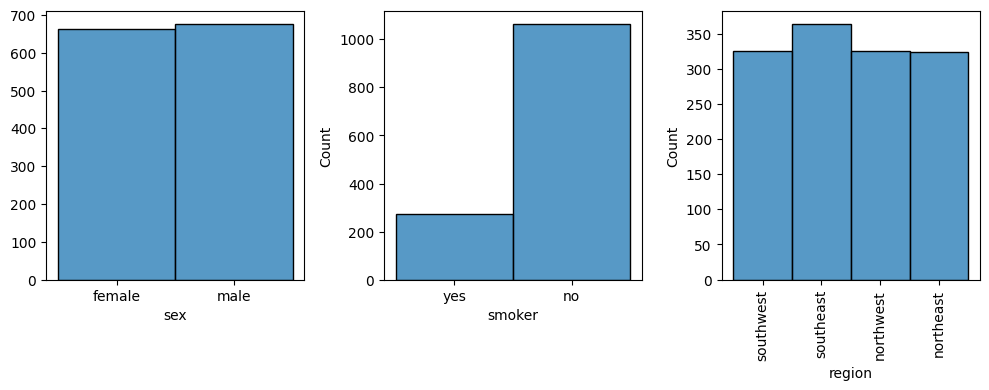

In [86]:
fig, axis = plt.subplots(1, 3, figsize=(10, 4))
sns.histplot(ax=axis[0], data=df, x="sex").set(ylabel=None)
sns.histplot(ax=axis[1], data=df, x="smoker")
sns.histplot(ax=axis[2], data=df, x="region")

axis[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

<h3> Observaciones </h3>

la distribucion entre hombres y mujeres esta muy equilibrada, 

En los  fumadores podemos observar que al rededor de un 25% de la poblacion si fuma, mientras que el restante no.

Se encuentran registros en todas las poblaciones entre 300 y 350 personas, con mas cantidad en la  region de southeasst

<h3>Análisis de Variables Univariante Numéricas</h3>

 en este conjunto de datos tenemos: age, bmi, children, charges, siendo charges nuestra variable a predecir.

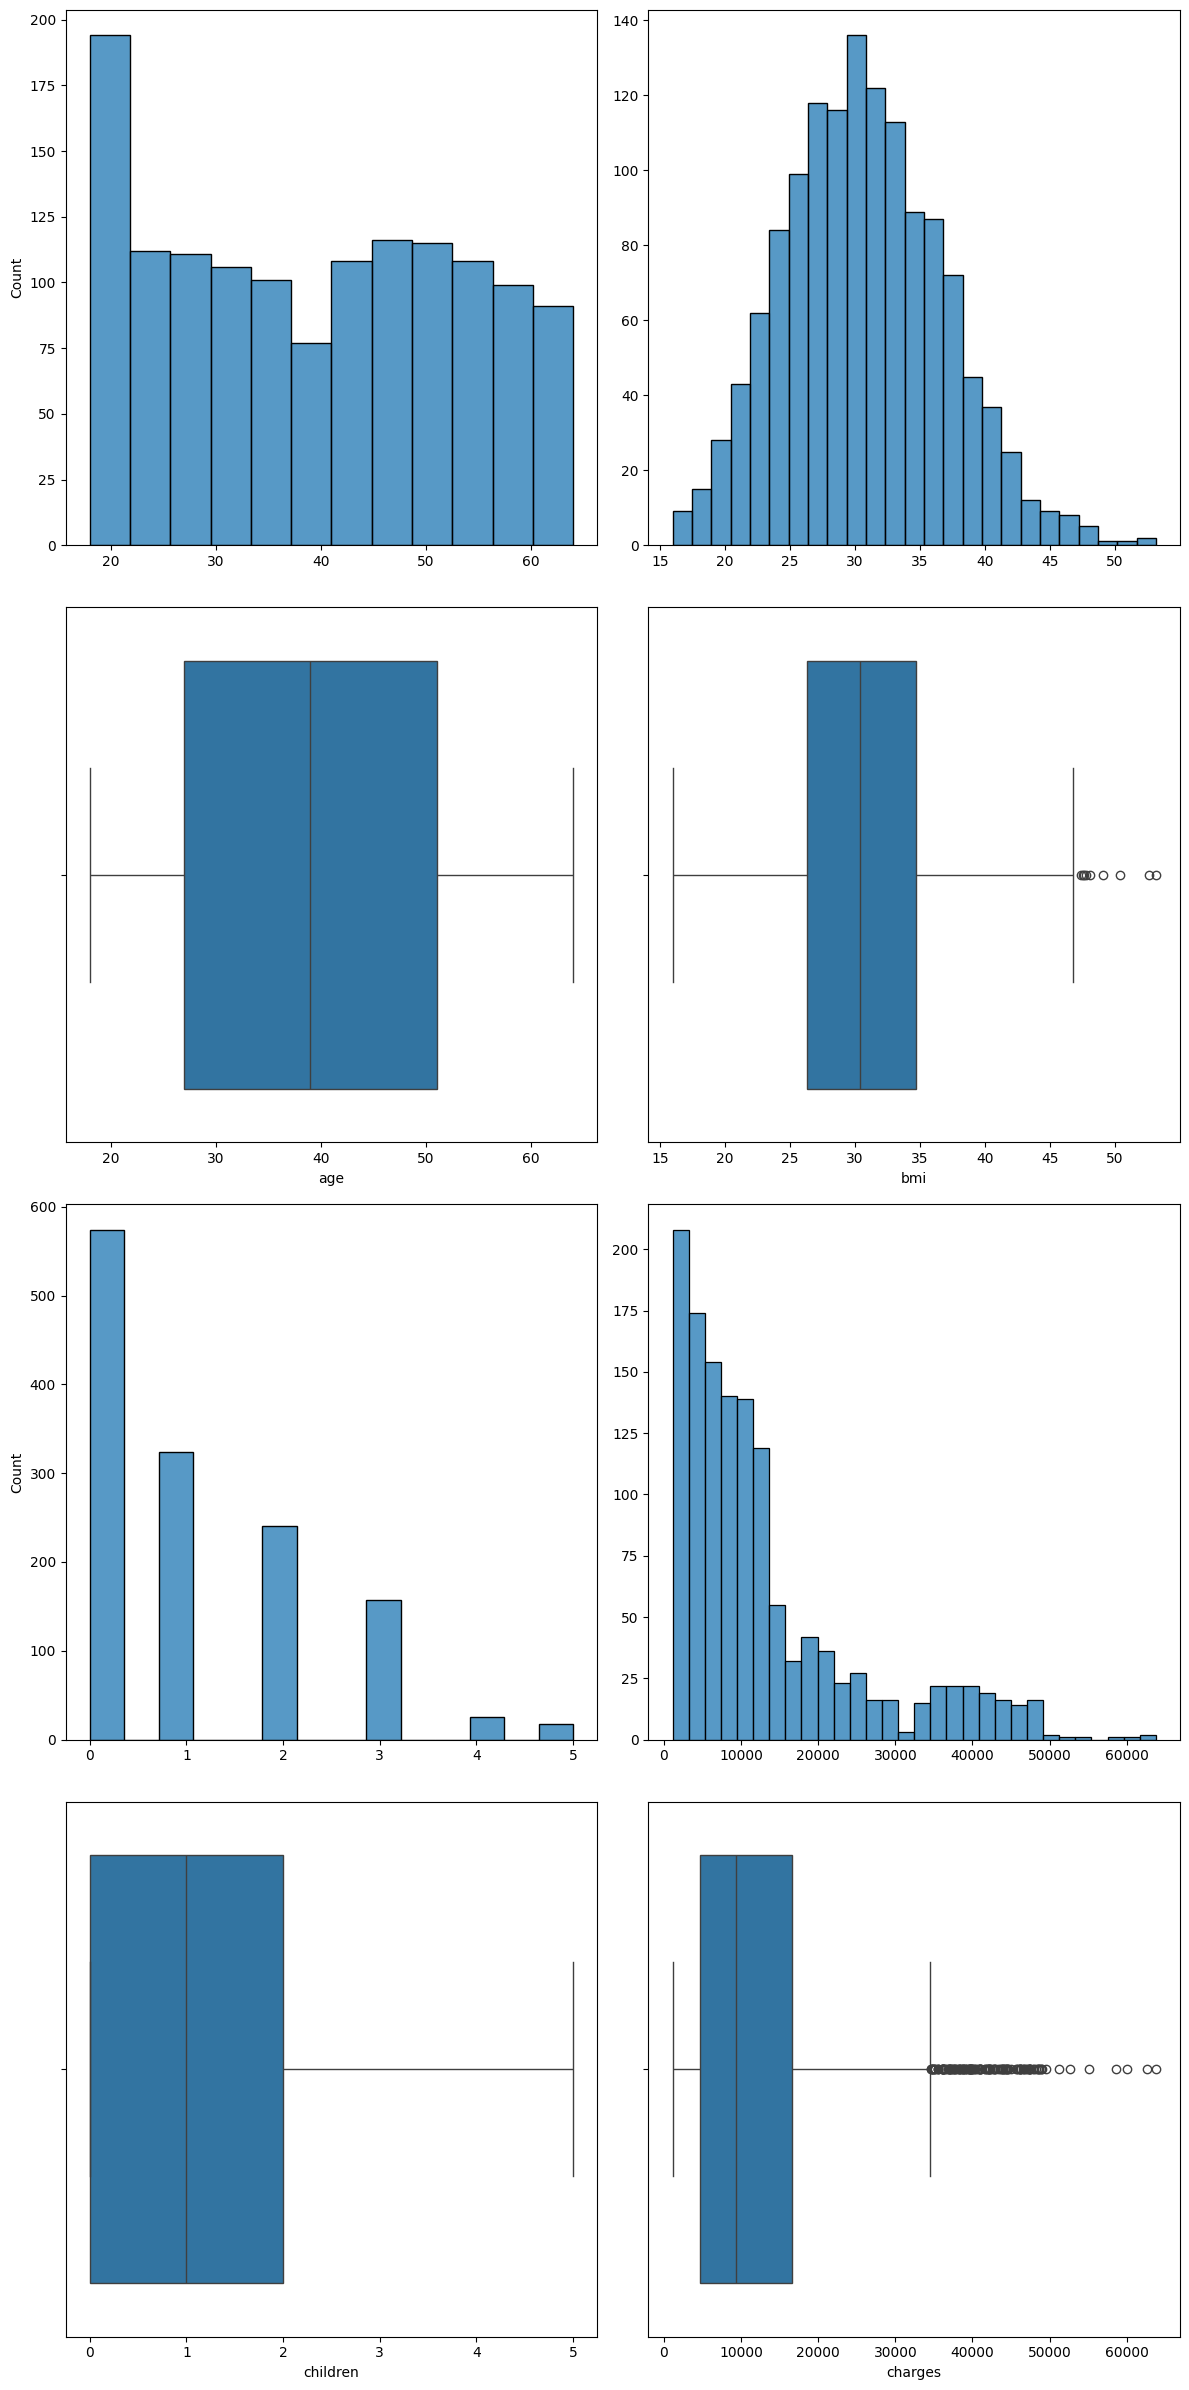

In [87]:
fig, axis = plt.subplots(4, 2, figsize=(12, 24))

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax=axis[0, 0], data=df, x="age").set(xlabel=None)
#axis[0, 0].set_xticks(np.arange(0, 600, 100))
sns.boxplot(ax=axis[1, 0], data=df, x="age")
sns.histplot(ax=axis[0, 1], data=df, x="bmi").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 1], data=df, x="bmi")
sns.histplot(ax=axis[2, 0], data=df, x="children").set(xlabel=None)
sns.boxplot(ax=axis[3, 0], data=df, x="children")
sns.histplot(ax=axis[2, 1], data=df, x="charges").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[3, 1], data=df, x="charges")

plt.tight_layout()
plt.show()

<h3> Observaciones </h3>
La media de las edades es de 39 aproximamente, con un mayor numero de registros entre 20 y  24 años
el indice de masa muscular tiene una distribucion normal con media en 31 con algunos outlaies apartir de 47 aproximadamente
existe un numero mas alto de personas que no tienen a nadie agregado a su seguro y va disminuyento conforme en cuanto aumenta el numero de personas agregadas al  seguro
los rangos de precios mas comunes se encuentran entre 1000 y 18.000 aproximadamente con una media de 10.000, se observan un gran nummero de outliers a partir de 37.000 y excasos a partir de 50.000. valdria la pena estudiar cada caso?

# Analisis de variables multivariantes

<h3> Analisis numerico-numerico </h3>
charges-(children, age, bmi)

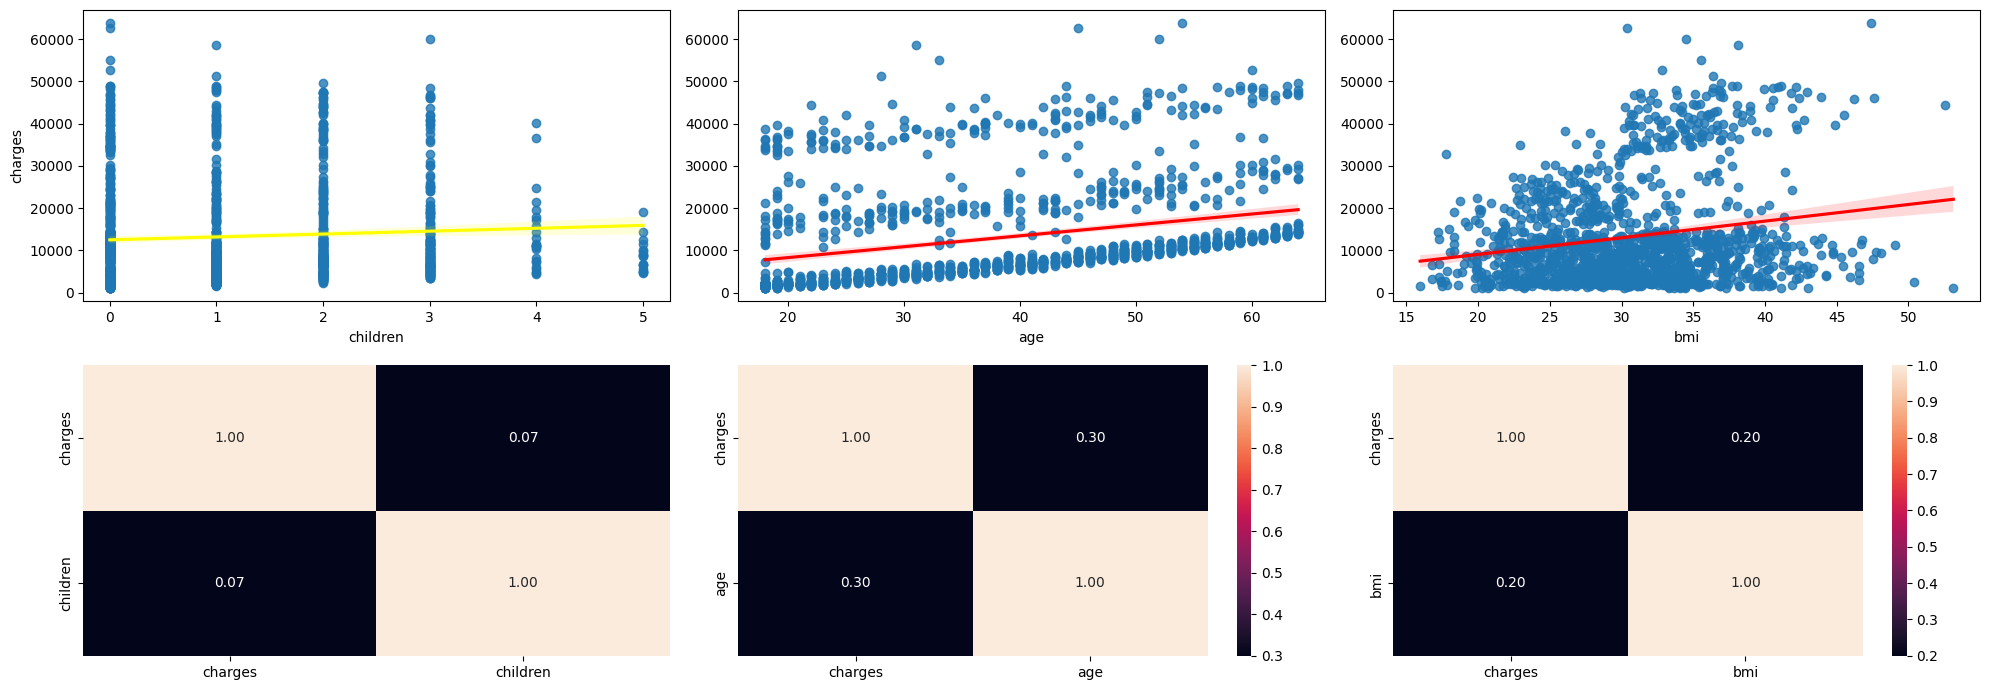

In [88]:
# Generamos las correlaciones
corr_charges_children = df[["charges", "children"]].corr()
corr_charges_age = df[["charges", "age"]].corr()
corr_charges_bmi = df[["charges", "bmi"]].corr()

# Crear un diagrama de dispersión múltiple
fig, axis = plt.subplots(2, 3, figsize=(20, 7))

sns.regplot(ax=axis[0, 0], data=df, x="children", y="charges", line_kws={'color': 'yellow'})
sns.heatmap(ax=axis[1, 0], data=corr_charges_children, annot=True, fmt=".2f", cbar=False)

sns.regplot(ax=axis[0, 1], data=df, x="age", y="charges", line_kws={'color': 'red'}).set(ylabel=None)
sns.heatmap(ax=axis[1, 1], data=corr_charges_age, annot=True, fmt=".2f")

sns.regplot(ax=axis[0, 2], data=df, x="bmi", y="charges", line_kws={'color': 'red'}).set(ylabel=None)
sns.heatmap(ax=axis[1, 2], data=corr_charges_bmi, annot=True, fmt=".2f")

plt.tight_layout()
plt.show()

<h3>Observaciones</h3>
No se observar correlaciones muy significativas, pero se puede observar que el precio tiene una ligera tendencia a aumentar cuando la edad y el undice de masa muscular son mas altos

# Analisis numerico-categorico

charges-(sex, smoker, region)

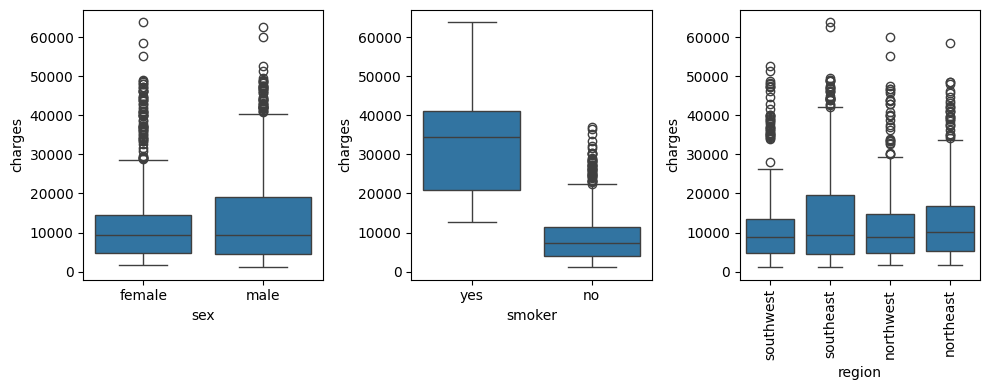

In [89]:
fig, axis = plt.subplots(1, 3, figsize=(10, 4))
sns.boxplot(ax=axis[0], data=df, x='sex', y='charges')
sns.boxplot(ax=axis[1], data=df, x='smoker', y='charges')
sns.boxplot(ax=axis[2], data=df, x='region', y='charges')

axis[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

<h3>Observaciones</h3>
los precios para los hombres pueden ser un poco mas altos para los hombres,

ser fumador eleva mucho mas el precio por el seguro,

la mediana en las regiones esta en un nivel similar,  todos poseen outliers en los cuales abria que identificar la razon de los mismos

# Eliminacion de outliers

In [90]:
df = df[(df["charges"] < 50000) & (df["bmi"] < 46)]

# Analisis de correlaciones

In [91]:
#construccion de un dataframe auxiliar numerico para analisis de correlaciones entre las variables
df_numerico = df.select_dtypes(include=['number'])

# Creo columnas numéricas para las variables categóricas

df_numerico['sex'] = pd.factorize(df['sex'])[0]
df_numerico['region'] = pd.factorize(df['region'])[0]
df_numerico['smoker'] = pd.factorize(df['smoker'])[0]
#casillas separadas


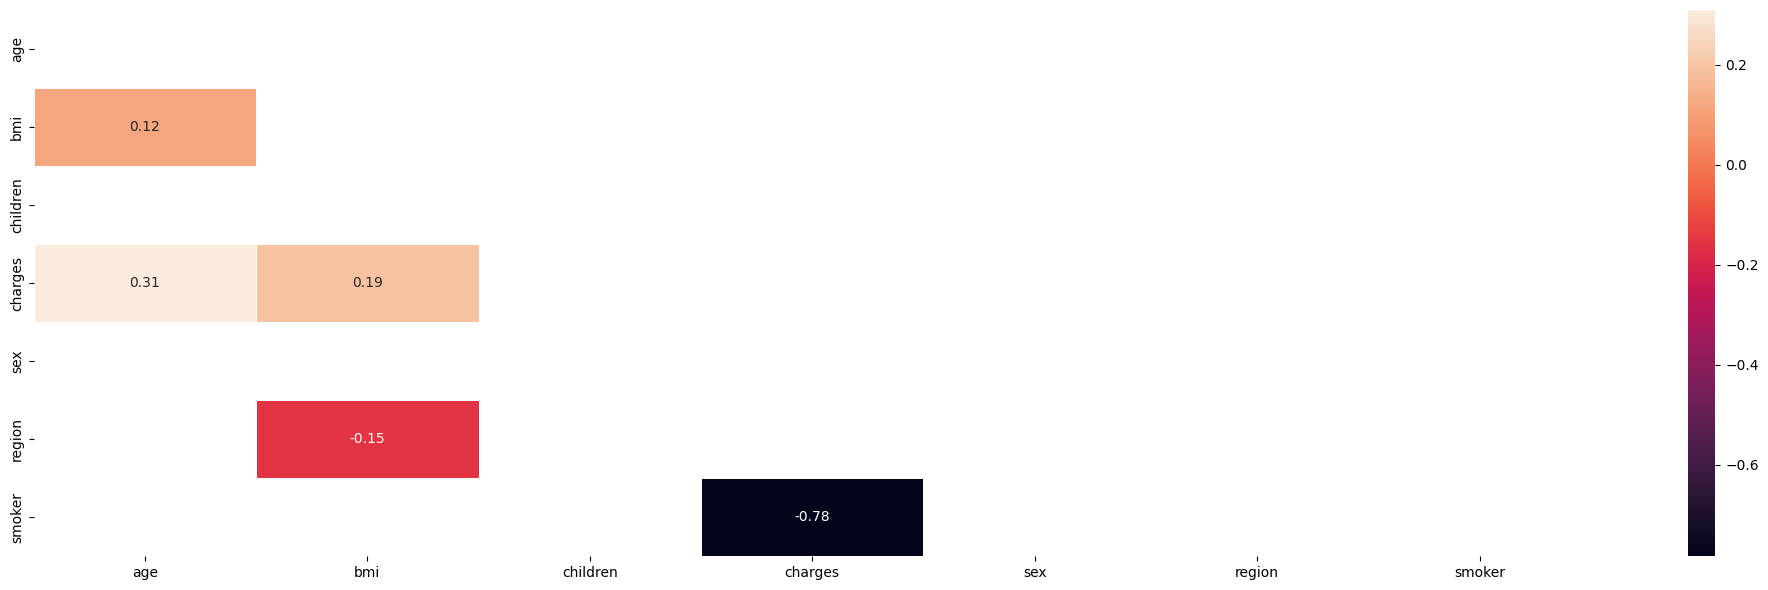

In [92]:
#correlacion de las variables con el df_numerico auxiliar
corr = df_numerico.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
significant_corr = corr[abs(corr) > 0.1]
significant_corr
fig, axis = plt.subplots(figsize=(20, 6))
sns.heatmap(significant_corr, mask=mask, annot=True, linewidths=0.5, fmt=".2f")
plt.tight_layout()
plt.show()

<h3>Observaciones</h3>
Al factorizar 0 se ha atribuido a una persona que fuma, por esta razon el 0.78 es negativo, exponiendo que si una persona fuma aumenta la prima del seguro, por otro lado, aunque no muy fuerte, se observa un ligero comportamiento de que para mayoress edades el precio aumenta un poco. 

No se observan correlaciones entre las variables independientes.

In [93]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Realizamos el split

In [94]:
# Dividimos el conjunto de datos en muestras de train y test
X = df.drop(["charges"], axis=1)
y = df["charges"]

# Instancia de: from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=18)

In [95]:
#Scaling y  encoding
#0. Creamos copias de los conjuntos de entrenamiento: X_train | X_test
X_train_cat_le = X_train.copy()
X_test_cat_le = X_test.copy()

#Para cada variable no numerica la transformamos en numerica y  la abregamos a nuestra copia de x_train

# 1. Creamos las instancias del encoder
label_encoder_sex = LabelEncoder()
# 2. Entrenamos los encoders con los datos de entrenamiento (ajustamos) fit
label_encoder_sex.fit(X_train['sex'])
# 3. Aplicamos el encoder en ambos conjuntos (entrenamiento y test) transform
X_train_cat_le['sex_le'] = label_encoder_sex.transform(X_train['sex'])
X_test_cat_le['sex_le'] = label_encoder_sex.transform(X_test['sex'])


# 1. Creamos las instancias del encoder
label_encoder_smoker = LabelEncoder()
# 2. Entrenamos los encoders con los datos de entrenamiento (ajustamos) utilizamos: fit()
label_encoder_smoker.fit(X_train['smoker'])
# 3. Aplicamos el encoder en ambos conjuntos (entrenamiento y test) transform
X_train_cat_le['smoker_le'] = label_encoder_smoker.transform(X_train['smoker'])  # 3.1 train
X_test_cat_le['smoker_le'] = label_encoder_smoker.transform(X_test['smoker'])  # 3.2 test

# 1. Creamos las instancias del encoder
label_encoder_region = LabelEncoder()
# 2. Entrenamos los encoders con los datos de entrenamiento (ajustamos) fit
label_encoder_region.fit(X_train['region'])
# 3. Aplicamos el encoder en ambos conjuntos (entrenamiento y test) transform
X_train_cat_le['region_le'] = label_encoder_region.transform(X_train['region'])
X_test_cat_le['region_le'] = label_encoder_region.transform(X_test['region'])

In [96]:
X_train.shape, X_test.shape

((1052, 6), (264, 6))

In [97]:
#0. Creamos copias de los conjuntos de entrenamiento: X_train | X_test
X_train_cat_le = X_train.copy()
X_test_cat_le = X_test.copy()

#Para cada variable no numerica la transformamos en numerica y  la abregamos a nuestra copia de x_train




# 1. Creamos las instancias del encoder
label_encoder_smoker = LabelEncoder()
# 2. Entrenamos los encoders con los datos de entrenamiento (ajustamos) utilizamos: fit()
label_encoder_smoker.fit(X_train['smoker'])
# 3. Aplicamos el encoder en ambos conjuntos (entrenamiento y test) transform
X_train_cat_le['smoker_le'] = label_encoder_smoker.transform(X_train['smoker'])  # 3.1 train
X_test_cat_le['smoker_le'] = label_encoder_smoker.transform(X_test['smoker'])  # 3.2 test



In [98]:
X_train_cat_le

,age,sex,bmi,children,smoker,region,smoker_le
792,22,female,23.180,0,no,northeast,0
186,26,female,29.920,2,no,southeast,0
246,60,female,38.060,0,no,southeast,0
795,27,male,28.500,0,yes,northwest,1
161,18,female,36.850,0,yes,southeast,1
...,...,...,...,...,...,...,...
244,63,female,27.740,0,yes,northeast,1
1217,29,male,37.290,2,no,southeast,0
850,37,female,30.780,0,yes,northeast,1
1163,18,female,28.215,0,no,northeast,0


# Normalizacion de los datos

In [99]:
#Realizar el escalado con el dataset dividido solo con las variables numericas
norm_scaler = StandardScaler()  # Instancia de: from sklearn.preprocessing import StandardScaler

num_variables = ["age",	"bmi",	"children", "smoker_le"]
norm_features_x_train = norm_scaler.fit_transform(X_train_cat_le[num_variables])
norm_features_x_test = norm_scaler.transform(X_test_cat_le[num_variables])

X_train_cat_le_scaled = pd.DataFrame(norm_features_x_train,
                       index=X_train_cat_le.index,
                       columns=num_variables)
X_test_cat_le_scaled = pd.DataFrame(norm_features_x_test,
                       index=X_test_cat_le.index,
                       columns=num_variables)
X_train_cat_le_scaled.head()

,age,bmi,children,smoker_le
792,-1.216908,-1.266244,-0.911489,-0.493456
186,-0.933021,-0.079835,0.734668,-0.493456
246,1.480015,1.353008,-0.911489,-0.493456
795,-0.862049,-0.329791,-0.911489,2.026523
161,-1.500794,1.140018,-0.911489,2.026523


# Genera y entrena el modelo

In [100]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_cat_le_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [101]:
print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b1, b2, b3, b4, b5,b6, b7): {model.coef_}")

Intercepto (a): 12995.41369152947
Coeficientes (b1, b2, b3, b4, b5,b6, b7): [3596.22484426 1665.44929591  797.81436767 9213.59514401]


# prediccion del modelo 

In [102]:
y_pred = model.predict(X_test_cat_le_scaled)
y_pred

array([27377.93775694,  5895.95358359,  6029.02851123, 10856.34124886,
         187.80228114, 13676.3428622 ,  3042.80293883, 11535.05554276,
       16033.73884061, 11778.1591542 , 11349.04719538,  5794.86051127,
       31286.18520896, 29751.28518895,  7881.88945978, 27564.83160644,
       11946.53838768,  5630.28265144,  7761.15279069, 38170.04365259,
       14728.09229213, 36195.9908205 , 15403.44338274, 13421.67732443,
        7321.66309545,   373.21456193,  4916.09958176,  3604.95035123,
       15613.37431467,  7798.54261454, 13850.43663471, 10352.90488709,
        7659.84786138, 10402.69484321,  7005.74696243, 12216.81067379,
       11758.7510625 ,  7849.64175645,  9451.03584001,  6528.48323372,
        8523.04154691, 33643.09432098,  2468.02777179, 14006.35255319,
       23255.07249721,  7469.10528147, 11713.0914199 , 33011.75677374,
       13509.24128372,  7657.85705689,  7123.35596358, 14510.61260392,
        4201.6888897 , 35273.82814931,  4651.63523919, 11348.49063313,
      

In [103]:
f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}"


'Error cuadrático medio: 30600133.251054127'

In [104]:
f"Coeficiente de determinación: {r2_score(y_test, y_pred)}"

'Coeficiente de determinación: 0.7713771766202475'

Error cuadrático medio: 36932181.461875245
Coeficiente de determinación: 0.7713
Si nos apoyamos en el valor del 
, observamos que es de un 76%, un valor un poco bajo, solo el 77% de los datos están explicados por el modelo, por lo que se trata de hacer una mejora.

prueba lasso_model

In [105]:
lasso_model = Lasso(alpha = 0.1, max_iter = 300)

lasso_model.fit(X_train_cat_le_scaled, y_train)

y_pred1 = lasso_model.predict(X_test_cat_le_scaled)

In [106]:
f"Error cuadrático medio: {mean_squared_error(y_test, y_pred1)}"


'Error cuadrático medio: 30600082.49602918'

In [107]:
f"Coeficiente de determinación: {r2_score(y_test, y_pred1)}"

'Coeficiente de determinación: 0.7713775558263448'

In [108]:

# Carga de los datos de train y test
# Estos datos deben haber sido normalizados y correctamente tratados en un EDA completo

ridge_model = Ridge(alpha = 0.1, max_iter = 300)

ridge_model.fit(X_train_cat_le_scaled, y_train)

y_pred2 = ridge_model.predict(X_test_cat_le_scaled)

In [109]:
f"Error cuadrático medio: {mean_squared_error(y_test, y_pred2)}"

'Error cuadrático medio: 30599572.107938413'

In [110]:
f"Coeficiente de determinación: {r2_score(y_test, y_pred2)}"

'Coeficiente de determinación: 0.7713813690896849'